# How to remove Multicollinearity in dataset using PCA?
https://towardsdatascience.com/how-to-remove-multicollinearity-in-dataset-using-pca-4b4561c28d0b

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

C:\Users\NFSI291\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


데이터 다운 로드
https://www.kaggle.com/shivam2503/diamonds?select=diamonds.csv

In [3]:
data = pd.read_csv('../data/diamonds.csv', usecols=['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', \
                                                         'x', 'y', 'z'])
data.shape
data.head()

(53940, 10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
data["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [5]:
data["clarity"].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [6]:
data["cut"] = data["cut"].replace({"Fair":0, "Good":1, "Very Good":2, "Premium":3, "Ideal":4})
data["color"] = data["color"].replace({'D':0, 'E':1, 'F':2, 'G':3, 'H':4, 'I':5, 'J':6})
data["clarity"] = data["clarity"].replace({'IF':0, 'VVS1':1, 'VVS2':2, 'VS1':3, 'VS2':4, 'SI1':5, 'SI2':6, 'I1':7})

In [7]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,1,6,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,5,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,3,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,6,63.3,58.0,335,4.34,4.35,2.75


In [8]:
y = data["price"]
X = data.drop("price", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

## Correlation

<Figure size 864x720 with 0 Axes>

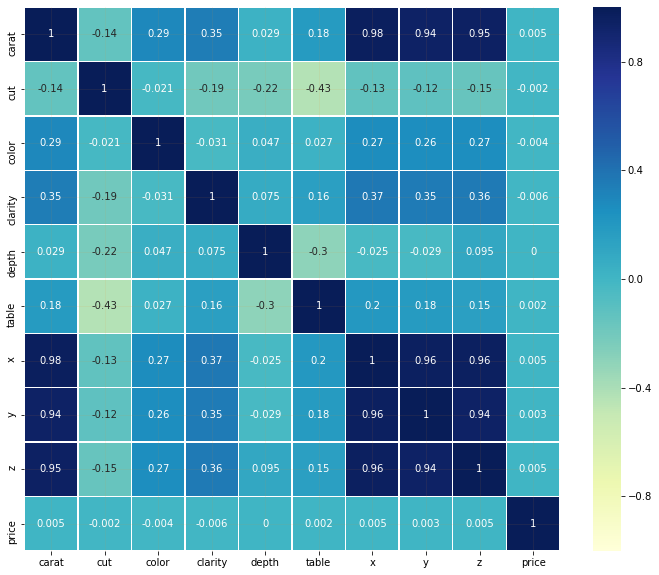

In [9]:
df_train = pd.DataFrame(X_train_std, columns=['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'])
df_train["price"] = y_train

corr = df_train.corr()
plt.figure(figsize = (12,10))

sns.heatmap(round(corr, 3), annot = True, vmin=-1, vmax=1, cmap="YlGnBu", linewidths=.5)
plt.grid(b=True, color='#f68c1f', alpha=0.1)
plt.show()

## PCA

In [10]:
X_train.shape[1]
X_train_std.shape[1]


9

9

Text(0.5, 0, 'n_components')

Text(0, 0.5, '% variance explained')

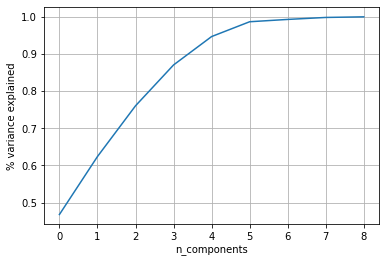

In [11]:
pca = PCA() # pca = PCA(n_components = X_train_std.shape[1])
pca_data = pca.fit_transform(X_train_std)

percent_var_explained = pca.explained_variance_/(np.sum(pca.explained_variance_))
cumm_var_explained = np.cumsum(percent_var_explained)

plt.plot(cumm_var_explained)
plt.grid()
plt.xlabel("n_components")
plt.ylabel("% variance explained")
plt.show()

In [12]:
cumm_var_explained

array([0.46800004, 0.62399519, 0.76054805, 0.87051307, 0.94693302,
       0.98678949, 0.99304207, 0.99836394, 1.        ])

In [13]:
pca.explained_variance_

array([4.21211188, 1.40399356, 1.22900828, 0.98971138, 0.68779783,
       0.35871768, 0.05627477, 0.04789809, 0.0147249 ])

In [14]:
sum(pca.explained_variance_ratio_)

1.0

In [15]:
pca = PCA(n_components=6)
pca_train_data = pca.fit_transform(X_train_std)
pca_test_data = pca.transform(X_test_std)

## Correlation after PCA:

<Figure size 864x720 with 0 Axes>

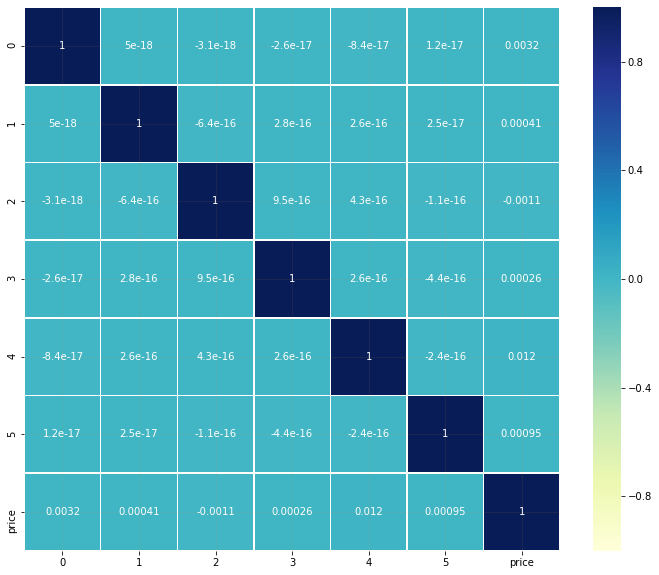

In [16]:
df_train_pca = pd.DataFrame(pca_train_data)
df_train_pca["price"] = y_train

corr = df_train_pca.corr()
plt.figure(figsize = (12,10))

sns.heatmap(corr, annot = True, vmin=-1, vmax=1, cmap="YlGnBu", linewidths=.5)
plt.grid(b=True, color='#f68c1f', alpha=0.1)
plt.show()

## High Variance Inflation Factor (VIF) and Low Tolerance

In [25]:
from statsmodels.datasets.longley import load_pandas

dfy = load_pandas().endog
dfX = load_pandas().exog
df = pd.concat([dfy, dfX], axis=1)
df

,TOTEMP,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
0,60323.0,83.0,234289.0,2356.0,1590.0,107608.0,1947.0
1,61122.0,88.5,259426.0,2325.0,1456.0,108632.0,1948.0
2,60171.0,88.2,258054.0,3682.0,1616.0,109773.0,1949.0
3,61187.0,89.5,284599.0,3351.0,1650.0,110929.0,1950.0
4,63221.0,96.2,328975.0,2099.0,3099.0,112075.0,1951.0
5,63639.0,98.1,346999.0,1932.0,3594.0,113270.0,1952.0
6,64989.0,99.0,365385.0,1870.0,3547.0,115094.0,1953.0
7,63761.0,100.0,363112.0,3578.0,3350.0,116219.0,1954.0
8,66019.0,101.2,397469.0,2904.0,3048.0,117388.0,1955.0
9,67857.0,104.6,419180.0,2822.0,2857.0,118734.0,1956.0


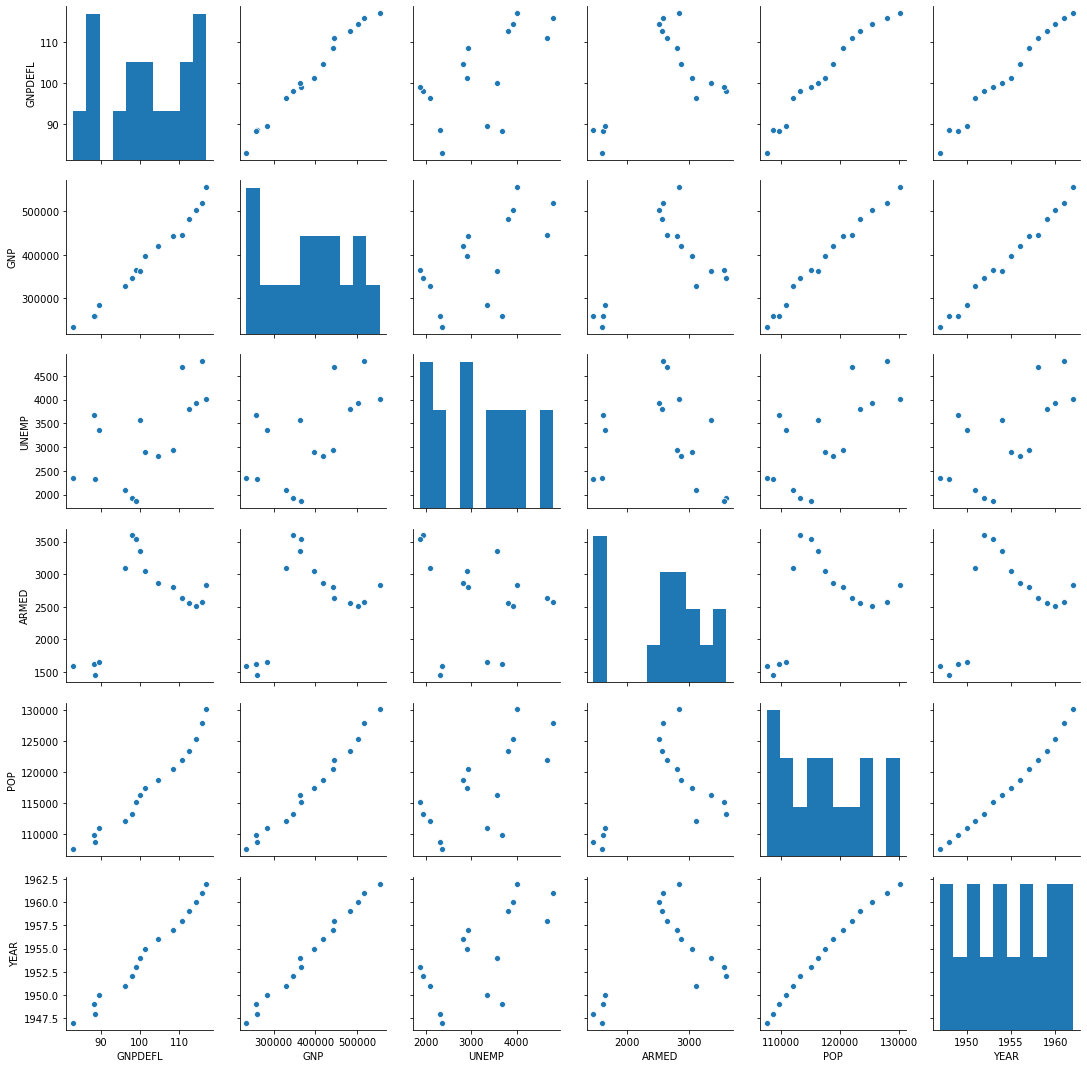

In [24]:
sns.pairplot(dfX)
plt.show()

## VIF는 수치형변수에만 사용
- 아래 예제는 단순 예제임 (볌주형을 수치형으로 취급한 사례)

In [17]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,1,6,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,5,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,3,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,6,63.3,58.0,335,4.34,4.35,2.75


In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dfX.values, i) for i in range(dfX.shape[1])]
vif["features"] = dfX.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

,VIF Factor,features
0,39.983386,ARMED
1,136.224354,UNEMP
2,10290.435437,GNP
3,12425.514335,GNPDEFL
4,84709.950443,YEAR
5,101193.161993,POP


In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x = data.drop('price', axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

,VIF Factor,features
0,3.725520,color
1,8.216459,clarity
2,8.769080,cut
3,74.116863,carat
4,531.679044,y
5,544.450793,table
6,562.311410,z
7,565.041522,depth
8,1359.226442,x


<Figure size 720x432 with 0 Axes>

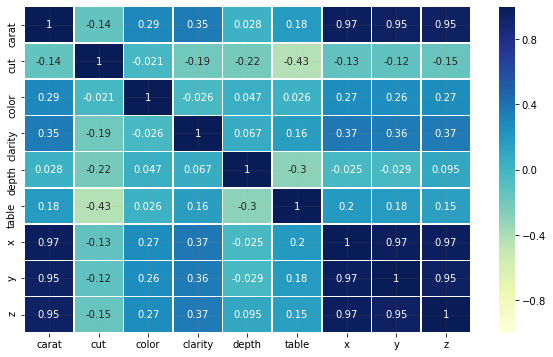

In [28]:
corr = x.corr()
plt.figure(figsize = (10,6))

sns.heatmap(round(corr, 3), annot = True, vmin=-1, vmax=1, cmap="YlGnBu", linewidths=.5)
plt.grid(b=True, color='#f68c1f', alpha=0.1)
plt.show()

https://datascienceschool.net/intro.html